In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import minmax_scale,StandardScaler

%matplotlib inline

In [65]:
my_best = pd.read_csv('ensemble/test4/combine_submission_20190205_182031_cv3.642718.csv')
my_best2 = pd.read_csv('output/combine_submission_20190206_183854_cv3.639315.csv')
my_best3 = pd.read_csv('output/combine_submission_20190207_050544_cv3.640543.csv')
something_diff2 = pd.read_csv('ensemble/test5/submission_blend_blend4.csv')
something_diff3 = pd.read_csv('output/submission_blend_blend5.csv')
something_diff4 = pd.read_csv('output/submission_blend_blend6.csv')
wow_isleak = pd.read_csv('output/combine_submission_20190208_165017_cv3.343579.csv')
overfitting = pd.read_csv('output/is_it_overfitting__20190131_171047_cv2.121559.csv')
fill_cardsize = pd.read_csv('output/combine_submission_20190209_190818_cv3.593867.csv')

In [67]:
something_diff3['target'].corr(fill_cardsize['target'])

0.9175475607048347

In [68]:
my_best['target'].corr(fill_cardsize['target'])

0.9583383560086015

In [57]:
fill_cardsize = fill_cardsize.merge(my_best,on='card_id')

In [59]:
fill_cardsize['diff'] = fill_cardsize['target_x'] - fill_cardsize['target_y']
fill_cardsize['abs_diff'] = np.abs(fill_cardsize['diff'])

In [63]:
fill_cardsize.sort_values('target_y').to_csv('compare_with_fillcardsize_and_mybest642718.csv',index=False)

In [48]:
print(np.sum(np.abs(my_best['target'] - fill_cardsize['target'])))
print(np.sum(np.abs(my_best2['target'] - fill_cardsize['target'])))
print(np.sum(np.abs(my_best3['target'] - fill_cardsize['target'])))
print(np.sum(np.abs(something_diff3['target'] - fill_cardsize['target'])))

20985.359533175644
20201.81245385919
20260.813616501327
33925.07152151711


In [41]:
whereis_cardid = list(set(my_best['card_id'].unique()) - set(wow_isleak['card_id'].unique()))

In [42]:
result = pd.concat([my_best.loc[my_best['card_id'].isin(whereis_cardid)],wow_isleak])

In [43]:
result.shape

(123623, 2)

In [44]:
result.to_csv('A dream of winter night2.csv',index=False)

In [5]:
something_diff3.loc[something_diff3['card_']]

(123623, 2)

In [4]:
something_diff4.shape

(123623, 2)

In [3]:
wow_isleak.shape

(110015, 2)

In [20]:
something_diff3.columns=['card_id','bestlb_target']

In [21]:
wow_isleak.shape

(110015, 2)

In [22]:
wow_isleak = wow_isleak.merge(something_diff3,on='card_id')

In [23]:
wow_isleak.shape

(110015, 3)

In [24]:
wow_isleak['diff'] = wow_isleak['target'] - wow_isleak['bestlb_target']
wow_isleak['abs_diff'] = np.abs(wow_isleak['diff'])

In [25]:
wow_isleak['abs_diff'].sum()

20696.105900789666

In [30]:
wow_isleak.sort_values('abs_diff',ascending=False)

,card_id,target,bestlb_target,diff,abs_diff
101128,C_ID_dc932bbd89,-12.584950,-33.219281,20.634331,20.634331
93819,C_ID_c27856d211,-12.974988,-33.219281,20.244293,20.244293
3041,C_ID_47a06004a5,-13.487496,-33.219281,19.731785,19.731785
106661,C_ID_4cdcd7bbb1,-13.998568,-33.219281,19.220713,19.220713
24486,C_ID_493de71141,-14.166151,-33.219281,19.053130,19.053130
38533,C_ID_dc60219f6c,-15.150049,-33.219281,18.069232,18.069232
22046,C_ID_151cb0ccbd,-15.985468,-33.219281,17.233813,17.233813
63113,C_ID_833aa2f7af,-16.944280,-33.219281,16.275001,16.275001
60326,C_ID_3b5972c942,-16.945252,-33.219281,16.274029,16.274029
17088,C_ID_0be3fb41d2,-17.125164,-33.219281,16.094117,16.094117


In [22]:
wow_isleak['diff'] = wow_isleak['target'] - my_best['target']

In [23]:
wow_isleak.sort_values('diff')

,card_id,target,diff
93460,C_ID_86ddafb51c,-22.181030,-22.085152
18354,C_ID_aae50409e7,-20.227504,-21.558903
28946,C_ID_ac114ef831,-21.683691,-21.497695
6938,C_ID_a74b12dcf8,-22.189595,-21.345262
69448,C_ID_6ab591cf62,-20.877324,-20.727181
24964,C_ID_e7f772dfc0,-19.847163,-19.370834
63113,C_ID_833aa2f7af,-16.944280,-17.972609
60326,C_ID_3b5972c942,-16.945252,-17.626083
71999,C_ID_bced41d837,-17.372979,-17.307571
31960,C_ID_5ee52cf9f6,-17.120474,-17.167040


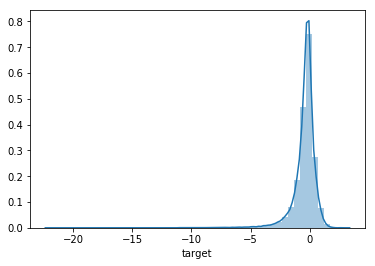

In [17]:
sns.distplot(wow_isleak['target'])

In [21]:
print(np.sum(np.abs(my_best['target'] - wow_isleak['target'])))
print(np.sum(np.abs(my_best2['target'] - wow_isleak['target'])))
print(np.sum(np.abs(my_best3['target'] - wow_isleak['target'])))
print(np.sum(np.abs(something_diff3['target'] - wow_isleak['target'])))

107521.8392757299
108589.77839666425
107837.63279369769
112560.8436474798


In [15]:
print(np.sum(np.abs(overfitting['target'] - something_diff3['target'])))
print(np.sum(np.abs(overfitting['target'] - wow_isleak['target'])))

109315.42416102049
117442.60544842435


In [10]:
print(np.sum(np.abs(something_diff2['target'] - something_diff3['target'])))
print(np.sum(np.abs(something_diff2['target'] - something_diff4['target'])))
print(np.sum(np.abs(something_diff3['target'] - something_diff4['target'])))


502.5984509435836
650.1069461435834
147.50849519999997
112560.8436474798


In [27]:
np.sum(np.abs(something_diff2['target'] - something_diff3['target']))

1625.0854073493745

In [29]:
something_diff2['target'].corr(something_diff3['target'])

0.9960295547717589

In [37]:
something_diff2['target'].corr(something_diff3['target'])

0.9963173326164035

In [6]:
np.sum(np.abs(my_best['target']-my_best2['target']))

9456.90663046056

In [20]:
np.sum(np.abs(my_best['target']-my_best3['target']))

8739.071004161533

In [8]:
np.sum(np.abs(something_diff2['target'] - my_best['target']))

23631.401353425223

In [10]:
np.sum(np.abs(something_diff2['target'] - my_best2['target']))

23945.915748352243

In [13]:
np.sum(np.abs(something_diff2['target'] - my_best3['target']))

23978.966699560493

In [22]:
hyeonwoo_best['target'].corr(my_best['target'])

0.9669816917131832

In [23]:
hyeonwoo_best['target'].corr(my_best2['target'])

0.966320182986105

In [24]:
hyeonwoo_best['target'].corr(my_best3['target'])

0.9670974828793822

In [21]:
my_best = pd.read_csv('ensemble/test4/combine_submission_20190205_182031_cv3.642718.csv')
hyeonwoo_best = pd.read_csv('ensemble/test4/v7_3.6444676717171722.csv')

In [3]:
my_best['target'].corr(hyeonwoo_best['target'])

0.9669816917131832

In [4]:
my_best['target'] = my_best['target']*0.3 + hyeonwoo_best['target']*0.7
my_best.to_csv('submission_hyeonwoo681_my684_0.7_0.3.csv',index=False)

In [104]:
lbbest = pd.read_csv('ensemble/test5/ensemble_bestlb_with_best_single.csv')
why = pd.read_csv('ensemble/test5/submission_blend_blend.csv')
iscorrect = pd.read_csv('ensemble/test5/submission_blend_blend2.csv')
something_diff = pd.read_csv('ensemble/test5/submission_blend_blend3.csv')
something_diff2 = pd.read_csv('ensemble/test5/submission_blend_blend4.csv')

In [31]:
len(set(lbbest.loc[lbbest['target']<-30,'card_id'].values).intersection(set(something_diff.loc[something_diff['target']<-30,'card_id'].values)))

20

In [ ]:
iscorrect

In [84]:
np.sqrt(0.029**2)

0.029

In [82]:
np.sum(why.loc[~why['card_id'].isin(iscorrect.loc[iscorrect['target']<-30,'card_id'].values),'target'] - iscorrect.loc[iscorrect['target']>-30,'target'])

0.0

In [121]:
why.loc[why['card_id'].isin(iscorrect.loc[iscorrect['target']<-30,'card_id'].values),'target']

3398     -1.365644
5008      0.483608
20556    -0.354106
24677    -1.463619
25739     0.919536
27384     1.300800
32446    -0.280895
43215     0.488349
43763     0.848221
44491    -0.786997
61765     1.245753
67665     0.674761
77658     1.127283
79345     1.179830
83378     1.196844
104991   -1.006395
105394   -0.843022
113597    1.256447
114106   -0.813720
119851   -0.495242
Name: target, dtype: float64

In [71]:
why.loc[~why['card_id'].isin(iscorrect.loc[iscorrect['target']<-30,'card_id'].values),'target'] - lbbest.loc[~(lbbest['target']<-30),'target']

0        -0.040623
1         0.062780
2         0.017250
3         0.031262
4         0.071227
5        -0.092002
6         0.055383
7         0.018923
8        -0.047844
9         0.045258
10        0.167557
11       -0.043244
12        0.023825
13        0.117321
14       -0.154941
15       -0.013899
16       -0.112848
17       -0.017794
18       -0.008031
19        0.022394
20       -0.096135
21       -0.001481
22        0.067861
23       -0.031799
24       -0.045992
25       -0.052392
26        0.125532
27        0.015152
28       -0.052254
29        0.001462
            ...   
123593    0.021341
123594    0.073414
123595    0.024774
123596    0.090034
123597    0.021500
123598    0.000651
123599    0.133293
123600    0.026994
123601    0.094849
123602    0.181432
123603    0.007594
123604    0.047981
123605   -0.086172
123606    0.032397
123607    0.054929
123608    0.124120
123609    0.025416
123610   -0.003670
123611    0.076567
123612    0.080626
123613    0.103634
123614    0.

In [90]:
outlier_err = 33
x_mean_err = np.sqrt((3.695**2*123624-(outlier_err**2*20))/123604)
x_mean_err

3.671379341084254

In [91]:
np.sqrt((x_mean_err**2*123604+outlier_err**2*20)/123624)

3.695

In [97]:
(3.666**2*123624-(x_mean_err**2*123604))

-4609.891655999934

In [118]:
(3.666**2*123624-(x_mean_err**2*123604))

-4609.891655999934

In [120]:
np.sqrt(abs((3.666**2*123624-(x_mean_err**2*123604))/20))

15.182048043659877

In [50]:
np.sqrt(np.sum((why.loc[why['card_id'].isin(lbbest.loc[lbbest['target']<-30,'card_id'].values),'target']-33.21928095)**2)/20)

33.06754774079416

In [105]:
lbbest['target'].corr(something_diff['target'])

0.9958637625722945

In [106]:
lbbest['target'].corr(something_diff2['target'])

0.9958416369403156

In [110]:
something_diff['target'].corr(something_diff2['target'])

0.9993362043399351

In [113]:
np.sum(np.abs(something_diff['target'] - something_diff2['target']))

1704.9815143861683

In [107]:
iscorrect['target'].corr(something_diff2['target'])

0.9982300989831512

In [108]:
lbbest['target'].corr(iscorrect['target'])

0.9969667054185023

In [25]:
something_diff.loc[something_diff['card_id'].isin(lbbest.loc[lbbest['target']<-33,'card_id'].values)].shape

(20, 2)